In [1]:
# Módulo 3 - Aula 2: Simulação de Consumo Energético e Probabilidade
# Tema: Previsão de Gastos Energéticos e Simulação de Investimentos

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import random

# Configuração visual
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
np.random.seed(42)  # Para reproduzir resultados

print("🔬 +CiênciaSJC - Módulo 3: Modelagem Computacional e Simulação")
print("=" * 60)
print("Aula 2: Simulação de Consumo Energético e Probabilidade")
print("=" * 60)

🔬 +CiênciaSJC - Módulo 3: Modelagem Computacional e Simulação
Aula 2: Simulação de Consumo Energético e Probabilidade


## ⚡ Simulação de Consumo Energético

O consumo de energia elétrica varia com:
- **Estação do ano** (ar condicionado no verão, aquecimento no inverno)
- **Dia da semana** (mais consumo nos dias úteis)
- **Hora do dia** (picos de consumo)
- **Fatores aleatórios** (variações imprevistas)

Vamos criar um modelo que simula o consumo energético de uma residência!

In [2]:
# Dados base para simulação
class SimuladorConsumoEnergetico:
    def __init__(self, consumo_base_kwh=150):
        self.consumo_base = consumo_base_kwh  # kWh por mês
        self.tarifa_kwh = 0.75  # R$ por kWh (exemplo)
        
    def fator_sazonal(self, mes):
        """Fator de ajuste sazonal (verão = mais consumo)"""
        fatores_mensais = {
            1: 1.3,   # Janeiro (verão)
            2: 1.2,   # Fevereiro
            3: 1.1,   # Março
            4: 0.9,   # Abril
            5: 0.8,   # Maio
            6: 0.7,   # Junho (inverno)
            7: 0.7,   # Julho
            8: 0.8,   # Agosto
            9: 0.9,   # Setembro
            10: 1.0,  # Outubro
            11: 1.1,  # Novembro
            12: 1.2   # Dezembro
        }
        return fatores_mensais.get(mes, 1.0)
    
    def fator_aleatorio(self):
        """Adiciona variação aleatória (-10% a +10%)"""
        return np.random.uniform(0.9, 1.1)
    
    def simular_consumo_mensal(self, mes, ano):
        """Simula consumo para um mês específico"""
        consumo = self.consumo_base
        consumo *= self.fator_sazonal(mes)
        consumo *= self.fator_aleatorio()
        
        # Adicionar tendência de crescimento anual (1% ao ano)
        consumo *= (1 + 0.01) ** (ano - 2023)
        
        return consumo
    
    def simular_periodo(self, anos=2):
        """Simula consumo para um período de anos"""
        resultados = []
        
        for ano in range(2023, 2023 + anos):
            for mes in range(1, 13):
                consumo_kwh = self.simular_consumo_mensal(mes, ano)
                custo_reais = consumo_kwh * self.tarifa_kwh
                
                resultados.append({
                    'ano': ano,
                    'mes': mes,
                    'data': f"{ano}-{mes:02d}",
                    'consumo_kwh': round(consumo_kwh, 2),
                    'custo_reais': round(custo_reais, 2),
                    'fator_sazonal': self.fator_sazonal(mes)
                })
        
        return pd.DataFrame(resultados)

# Criando simulador e gerando dados
simulador = SimuladorConsumoEnergetico(consumo_base_kwh=180)
dados_energia = simulador.simular_periodo(anos=3)

print("📊 Simulação de Consumo Energético (primeiros 12 meses):")
print(dados_energia.head(12))
print()

# Estatísticas básicas
print("📈 Estatísticas do Consumo:")
print(f"Consumo médio mensal: {dados_energia['consumo_kwh'].mean():.2f} kWh")
print(f"Custo médio mensal: R$ {dados_energia['custo_reais'].mean():.2f}")
print(f"Custo total anual: R$ {dados_energia['custo_reais'].sum()/3:.2f}")

📊 Simulação de Consumo Energético (primeiros 12 meses):
     ano  mes     data  consumo_kwh  custo_reais  fator_sazonal
0   2023    1  2023-01       228.13       171.10            1.3
1   2023    2  2023-02       235.47       176.60            1.2
2   2023    3  2023-03       207.19       155.39            1.1
3   2023    4  2023-04       165.20       123.90            0.9
4   2023    5  2023-05       134.09       100.57            0.8
5   2023    6  2023-06       117.33        88.00            0.7
6   2023    7  2023-07       114.86        86.15            0.7
7   2023    8  2023-08       154.55       115.91            0.8
8   2023    9  2023-09       165.28       123.96            0.9
9   2023   10  2023-10       187.49       140.62            1.0
10  2023   11  2023-11       179.02       134.26            1.1
11  2023   12  2023-12       236.30       177.23            1.2

📈 Estatísticas do Consumo:
Consumo médio mensal: 176.71 kWh
Custo médio mensal: R$ 132.53
Custo total anual: R$

## 📊 Visualizando os Padrões de Consumo

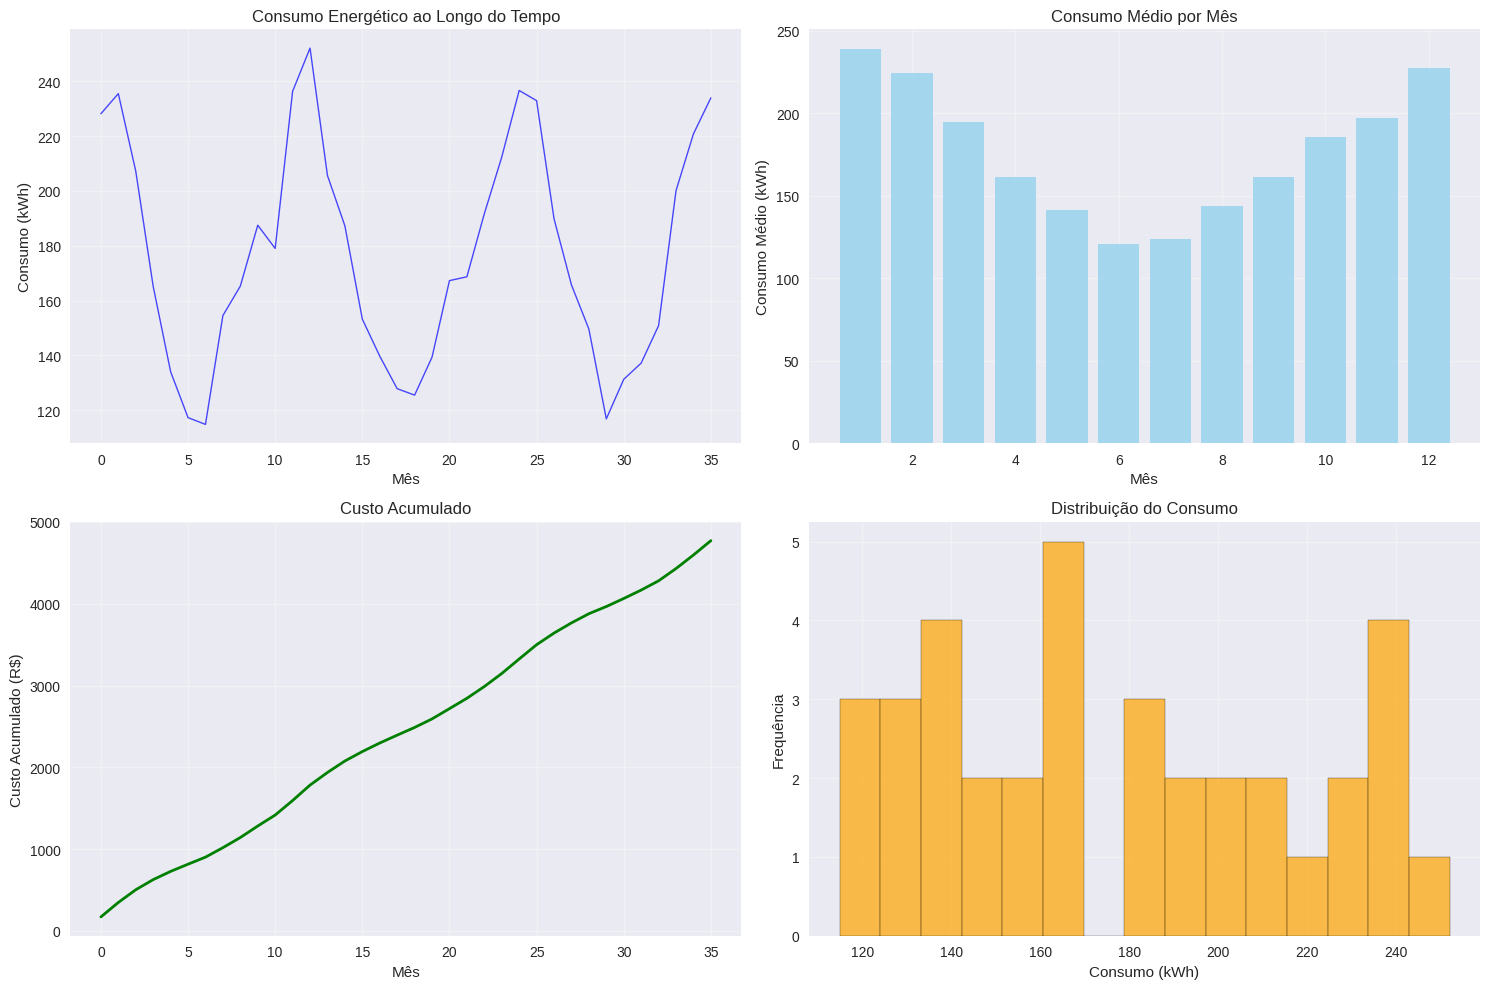

In [3]:
# Criando visualizações
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Gráfico 1: Consumo ao longo do tempo
axes[0,0].plot(range(len(dados_energia)), dados_energia['consumo_kwh'], 
               'b-', linewidth=1, alpha=0.7)
axes[0,0].set_title('Consumo Energético ao Longo do Tempo')
axes[0,0].set_xlabel('Mês')
axes[0,0].set_ylabel('Consumo (kWh)')
axes[0,0].grid(True, alpha=0.3)

# Gráfico 2: Consumo por mês (padrão sazonal)
consumo_por_mes = dados_energia.groupby('mes')['consumo_kwh'].mean()
axes[0,1].bar(consumo_por_mes.index, consumo_por_mes.values, 
              color='skyblue', alpha=0.7)
axes[0,1].set_title('Consumo Médio por Mês')
axes[0,1].set_xlabel('Mês')
axes[0,1].set_ylabel('Consumo Médio (kWh)')
axes[0,1].grid(True, alpha=0.3)

# Gráfico 3: Custo acumulado
dados_energia['custo_acumulado'] = dados_energia['custo_reais'].cumsum()
axes[1,0].plot(range(len(dados_energia)), dados_energia['custo_acumulado'], 
               'g-', linewidth=2)
axes[1,0].set_title('Custo Acumulado')
axes[1,0].set_xlabel('Mês')
axes[1,0].set_ylabel('Custo Acumulado (R$)')
axes[1,0].grid(True, alpha=0.3)

# Gráfico 4: Distribuição do consumo
axes[1,1].hist(dados_energia['consumo_kwh'], bins=15, 
               color='orange', alpha=0.7, edgecolor='black')
axes[1,1].set_title('Distribuição do Consumo')
axes[1,1].set_xlabel('Consumo (kWh)')
axes[1,1].set_ylabel('Frequência')
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 🎲 Introdução à Probabilidade em Simulações

A probabilidade nos ajuda a modelar **incertezas** e **variações aleatórias**.

### Conceitos importantes:
- **Distribuição normal**: valores se concentram em torno da média
- **Distribuição uniforme**: todos os valores têm a mesma probabilidade
- **Monte Carlo**: usar aleatoriedade para resolver problemas complexos

🎲 Simulação de Eventos Aleatórios:
Média do consumo simulado: 186.16 kWh
Desvio padrão: 26.83 kWh
Consumo mínimo: 162.00 kWh
Consumo máximo: 302.40 kWh


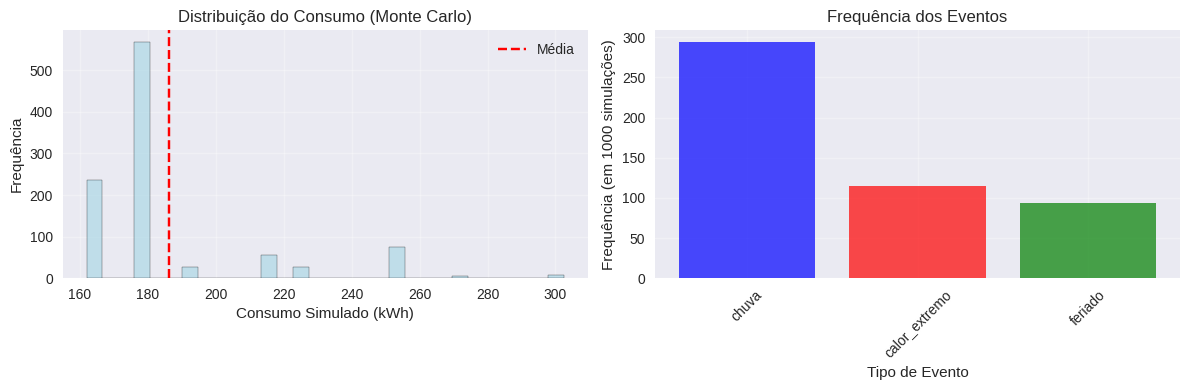

In [4]:
# Exemplo: Simulação de eventos aleatórios
def simular_eventos_aleatorios(n_simulacoes=1000):
    """
    Simula eventos que podem afetar o consumo energético
    """
    eventos = []
    
    for i in range(n_simulacoes):
        # Probabilidade de cada evento
        chuva = np.random.random() < 0.3  # 30% de chance de chuva
        calor_extremo = np.random.random() < 0.1  # 10% de chance
        feriado = np.random.random() < 0.08  # 8% de chance (aproximadamente)
        
        # Impacto no consumo
        fator_consumo = 1.0
        if chuva:
            fator_consumo *= 0.9  # Reduz 10% (menos ar condicionado)
        if calor_extremo:
            fator_consumo *= 1.4  # Aumenta 40%
        if feriado:
            fator_consumo *= 1.2  # Aumenta 20% (mais tempo em casa)
        
        eventos.append({
            'simulacao': i,
            'chuva': chuva,
            'calor_extremo': calor_extremo,
            'feriado': feriado,
            'fator_consumo': fator_consumo,
            'consumo_simulado': 180 * fator_consumo  # Consumo base * fator
        })
    
    return pd.DataFrame(eventos)

# Executando simulação
simulacao_eventos = simular_eventos_aleatorios(1000)

print("🎲 Simulação de Eventos Aleatórios:")
print(f"Média do consumo simulado: {simulacao_eventos['consumo_simulado'].mean():.2f} kWh")
print(f"Desvio padrão: {simulacao_eventos['consumo_simulado'].std():.2f} kWh")
print(f"Consumo mínimo: {simulacao_eventos['consumo_simulado'].min():.2f} kWh")
print(f"Consumo máximo: {simulacao_eventos['consumo_simulado'].max():.2f} kWh")

# Visualizando a distribuição
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(simulacao_eventos['consumo_simulado'], bins=30, 
         color='lightblue', alpha=0.7, edgecolor='black')
plt.axvline(simulacao_eventos['consumo_simulado'].mean(), 
            color='red', linestyle='--', label='Média')
plt.xlabel('Consumo Simulado (kWh)')
plt.ylabel('Frequência')
plt.title('Distribuição do Consumo (Monte Carlo)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
eventos_freq = simulacao_eventos[['chuva', 'calor_extremo', 'feriado']].sum()
plt.bar(eventos_freq.index, eventos_freq.values, color=['blue', 'red', 'green'], alpha=0.7)
plt.xlabel('Tipo de Evento')
plt.ylabel('Frequência (em 1000 simulações)')
plt.title('Frequência dos Eventos')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 💰 Simulação de Investimentos

Agora vamos aplicar probabilidade para simular investimentos!

In [5]:
class SimuladorInvestimentos:
    def __init__(self, valor_inicial=1000):
        self.valor_inicial = valor_inicial
        
    def simular_poupanca(self, meses=12, taxa_mensal=0.005):
        """Simula rendimento da poupança (taxa fixa)"""
        valores = [self.valor_inicial]
        
        for mes in range(meses):
            novo_valor = valores[-1] * (1 + taxa_mensal)
            valores.append(novo_valor)
        
        return valores
    
    def simular_acoes(self, meses=12, retorno_medio=0.01, volatilidade=0.05):
        """Simula investimento em ações (com variação aleatória)"""
        valores = [self.valor_inicial]
        
        for mes in range(meses):
            # Retorno aleatório baseado em distribuição normal
            retorno_mensal = np.random.normal(retorno_medio, volatilidade)
            novo_valor = valores[-1] * (1 + retorno_mensal)
            valores.append(novo_valor)
        
        return valores
    
    def simular_cdb(self, meses=12, taxa_mensal=0.008):
        """Simula CDB (taxa fixa mais alta que poupança)"""
        valores = [self.valor_inicial]
        
        for mes in range(meses):
            novo_valor = valores[-1] * (1 + taxa_mensal)
            valores.append(novo_valor)
        
        return valores
    
    def simular_multiplos_cenarios(self, n_simulacoes=100, meses=12):
        """Simula múltiplos cenários para comparação"""
        resultados = {
            'poupanca': [],
            'acoes': [],
            'cdb': []
        }
        
        for i in range(n_simulacoes):
            # Poupança (sempre igual)
            poupanca = self.simular_poupanca(meses)
            resultados['poupanca'].append(poupanca[-1])
            
            # Ações (varia a cada simulação)
            acoes = self.simular_acoes(meses)
            resultados['acoes'].append(acoes[-1])
            
            # CDB (sempre igual)
            cdb = self.simular_cdb(meses)
            resultados['cdb'].append(cdb[-1])
        
        return pd.DataFrame(resultados)

# Executando simulação de investimentos
simulador_invest = SimuladorInvestimentos(valor_inicial=1000)

# Simulação única para visualização
poupanca_exemplo = simulador_invest.simular_poupanca(24)
acoes_exemplo = simulador_invest.simular_acoes(24)
cdb_exemplo = simulador_invest.simular_cdb(24)

# Múltiplas simulações para análise estatística
resultados_multiplos = simulador_invest.simular_multiplos_cenarios(1000, 12)

print("💰 Simulação de Investimentos (R$ 1000 por 12 meses):")
print(f"Poupança final: R$ {resultados_multiplos['poupanca'].mean():.2f}")
print(f"Ações (média): R$ {resultados_multiplos['acoes'].mean():.2f}")
print(f"CDB final: R$ {resultados_multiplos['cdb'].mean():.2f}")
print()

print("📊 Análise de Risco (Ações):")
print(f"Valor mínimo: R$ {resultados_multiplos['acoes'].min():.2f}")
print(f"Valor máximo: R$ {resultados_multiplos['acoes'].max():.2f}")
print(f"Desvio padrão: R$ {resultados_multiplos['acoes'].std():.2f}")

💰 Simulação de Investimentos (R$ 1000 por 12 meses):
Poupança final: R$ 1061.68
Ações (média): R$ 1122.71
CDB final: R$ 1100.34

📊 Análise de Risco (Ações):
Valor mínimo: R$ 662.35
Valor máximo: R$ 1792.35
Desvio padrão: R$ 190.32


## 📈 Comparando Investimentos

/tmp/ipykernel_6889/3850183770.py:33: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1,0].boxplot([investimentos_df['Poupança'],


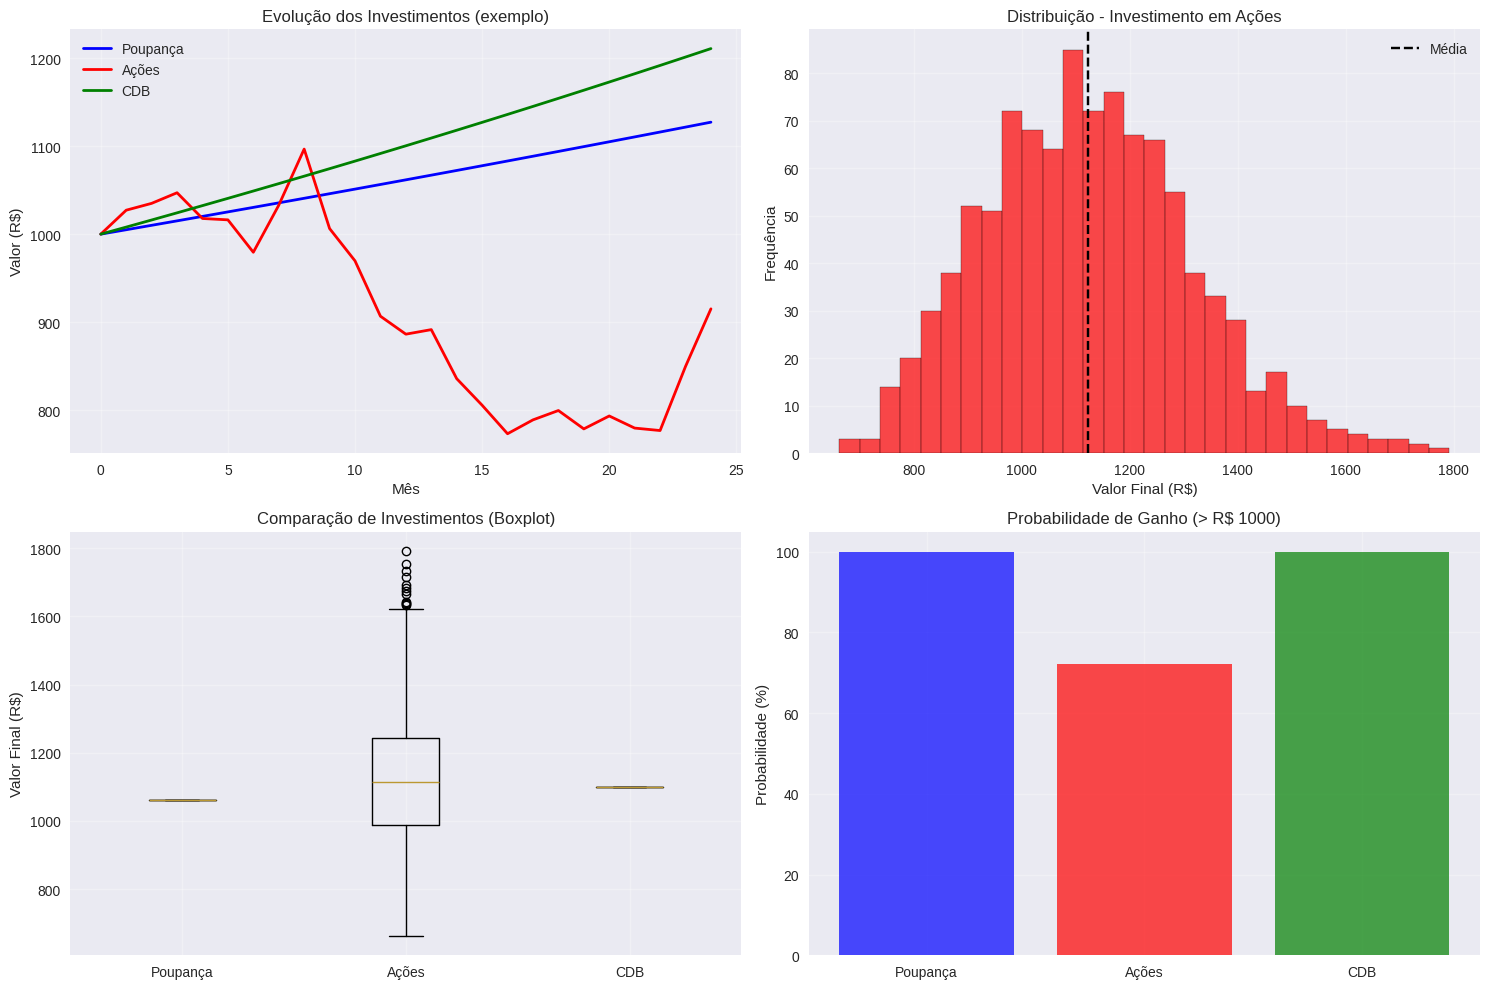

In [6]:
# Visualizações dos investimentos
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Gráfico 1: Evolução temporal (um exemplo)
meses = range(len(poupanca_exemplo))
axes[0,0].plot(meses, poupanca_exemplo, 'b-', label='Poupança', linewidth=2)
axes[0,0].plot(meses, acoes_exemplo, 'r-', label='Ações', linewidth=2)
axes[0,0].plot(meses, cdb_exemplo, 'g-', label='CDB', linewidth=2)
axes[0,0].set_title('Evolução dos Investimentos (exemplo)')
axes[0,0].set_xlabel('Mês')
axes[0,0].set_ylabel('Valor (R$)')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# Gráfico 2: Distribuição das ações (risco)
axes[0,1].hist(resultados_multiplos['acoes'], bins=30, 
               color='red', alpha=0.7, edgecolor='black')
axes[0,1].axvline(resultados_multiplos['acoes'].mean(), 
                  color='black', linestyle='--', label='Média')
axes[0,1].set_title('Distribuição - Investimento em Ações')
axes[0,1].set_xlabel('Valor Final (R$)')
axes[0,1].set_ylabel('Frequência')
axes[0,1].legend()
axes[0,1].grid(True, alpha=0.3)

# Gráfico 3: Comparação boxplot
investimentos_df = pd.DataFrame({
    'Poupança': resultados_multiplos['poupanca'],
    'Ações': resultados_multiplos['acoes'],
    'CDB': resultados_multiplos['cdb']
})

axes[1,0].boxplot([investimentos_df['Poupança'], 
                   investimentos_df['Ações'], 
                   investimentos_df['CDB']], 
                  labels=['Poupança', 'Ações', 'CDB'])
axes[1,0].set_title('Comparação de Investimentos (Boxplot)')
axes[1,0].set_ylabel('Valor Final (R$)')
axes[1,0].grid(True, alpha=0.3)

# Gráfico 4: Probabilidade de ganho
prob_ganho_acoes = (resultados_multiplos['acoes'] > 1000).mean() * 100
prob_ganho_poupanca = (resultados_multiplos['poupanca'] > 1000).mean() * 100
prob_ganho_cdb = (resultados_multiplos['cdb'] > 1000).mean() * 100

probabilidades = [prob_ganho_poupanca, prob_ganho_acoes, prob_ganho_cdb]
investimentos_nomes = ['Poupança', 'Ações', 'CDB']

axes[1,1].bar(investimentos_nomes, probabilidades, 
              color=['blue', 'red', 'green'], alpha=0.7)
axes[1,1].set_title('Probabilidade de Ganho (> R$ 1000)')
axes[1,1].set_ylabel('Probabilidade (%)')
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 🎯 Projeto Prático Integrado: Simulação de Gastos Energéticos

Vamos combinar tudo que aprendemos em um projeto completo!

In [7]:
class ProjetoSimulacaoCompleta:
    def __init__(self):
        self.simulador_energia = SimuladorConsumoEnergetico(consumo_base_kwh=200)
        self.simulador_invest = SimuladorInvestimentos(valor_inicial=500)
        
    def simular_economia_energia(self, meses=24):
        """
        Simula economia de energia com diferentes estratégias
        """
        # Cenário 1: Sem economia (consumo normal)
        dados_normal = self.simulador_energia.simular_periodo(anos=2)
        
        # Cenário 2: Com economia (redução de 15%)
        self.simulador_energia.consumo_base = 170  # Reduzido
        dados_economia = self.simulador_energia.simular_periodo(anos=2)
        
        # Cenário 3: Com energia solar (redução de 40%)
        self.simulador_energia.consumo_base = 120  # Muito reduzido
        dados_solar = self.simulador_energia.simular_periodo(anos=2)
        
        # Comparação
        comparacao = pd.DataFrame({
            'cenario': ['Normal', 'Economia', 'Solar'],
            'custo_total': [
                dados_normal['custo_reais'].sum(),
                dados_economia['custo_reais'].sum(),
                dados_solar['custo_reais'].sum()
            ]
        })
        
        comparacao['economia_reais'] = comparacao['custo_total'].iloc[0] - comparacao['custo_total']
        comparacao['economia_percent'] = (comparacao['economia_reais'] / comparacao['custo_total'].iloc[0]) * 100
        
        return comparacao, dados_normal, dados_economia, dados_solar
    
    def simular_investimento_economia(self, valor_economizado=100, meses=24):
        """
        Simula investimento do dinheiro economizado
        """
        # Simular investimento mensal da economia
        resultados = []
        
        for mes in range(meses):
            # Valor acumulado até o mês
            valor_total = valor_economizado * (mes + 1)
            
            # Simular rendimento se investido
            if mes > 0:
                rendimento_poupanca = valor_total * (1.005 ** mes)
                rendimento_acoes = valor_total * (1 + np.random.normal(0.01, 0.05)) ** mes
                rendimento_cdb = valor_total * (1.008 ** mes)
            else:
                rendimento_poupanca = valor_total
                rendimento_acoes = valor_total
                rendimento_cdb = valor_total
            
            resultados.append({
                'mes': mes + 1,
                'economia_acumulada': valor_total,
                'rendimento_poupanca': rendimento_poupanca,
                'rendimento_acoes': rendimento_acoes,
                'rendimento_cdb': rendimento_cdb
            })
        
        return pd.DataFrame(resultados)

# Executando projeto completo
projeto = ProjetoSimulacaoCompleta()

# Simulação de economia de energia
comparacao_energia, dados_normal, dados_economia, dados_solar = projeto.simular_economia_energia()

print("⚡ Comparação de Cenários Energéticos (24 meses):")
print(comparacao_energia)
print()

# Simulação de investimento da economia
economia_mensal = (dados_normal['custo_reais'].sum() - dados_economia['custo_reais'].sum()) / 24
investimento_economia = projeto.simular_investimento_economia(economia_mensal, 24)

print(f"💡 Economia mensal média: R$ {economia_mensal:.2f}")
print("📈 Simulação de Investimento da Economia:")
print(investimento_economia.tail())

⚡ Comparação de Cenários Energéticos (24 meses):
    cenario  custo_total  economia_reais  economia_percent
0    Normal      3410.30            0.00          0.000000
1  Economia      2981.67          428.63         12.568689
2     Solar      2122.69         1287.61         37.756502

💡 Economia mensal média: R$ 17.86
📈 Simulação de Investimento da Economia:
    mes  economia_acumulada  rendimento_poupanca  rendimento_acoes  \
19   20          357.191667           392.696013        189.015496   
20   21          375.051250           414.392467        152.148615   
21   22          392.910833           436.296069        136.997438   
22   23          410.770417           458.408347        747.734144   
23   24          428.630000           480.730841        764.174668   

    rendimento_cdb  
19      415.576928  
20      439.846620  
21      464.478031  
22      489.475394  
23      514.842989  


## 📊 Visualização Final do Projeto

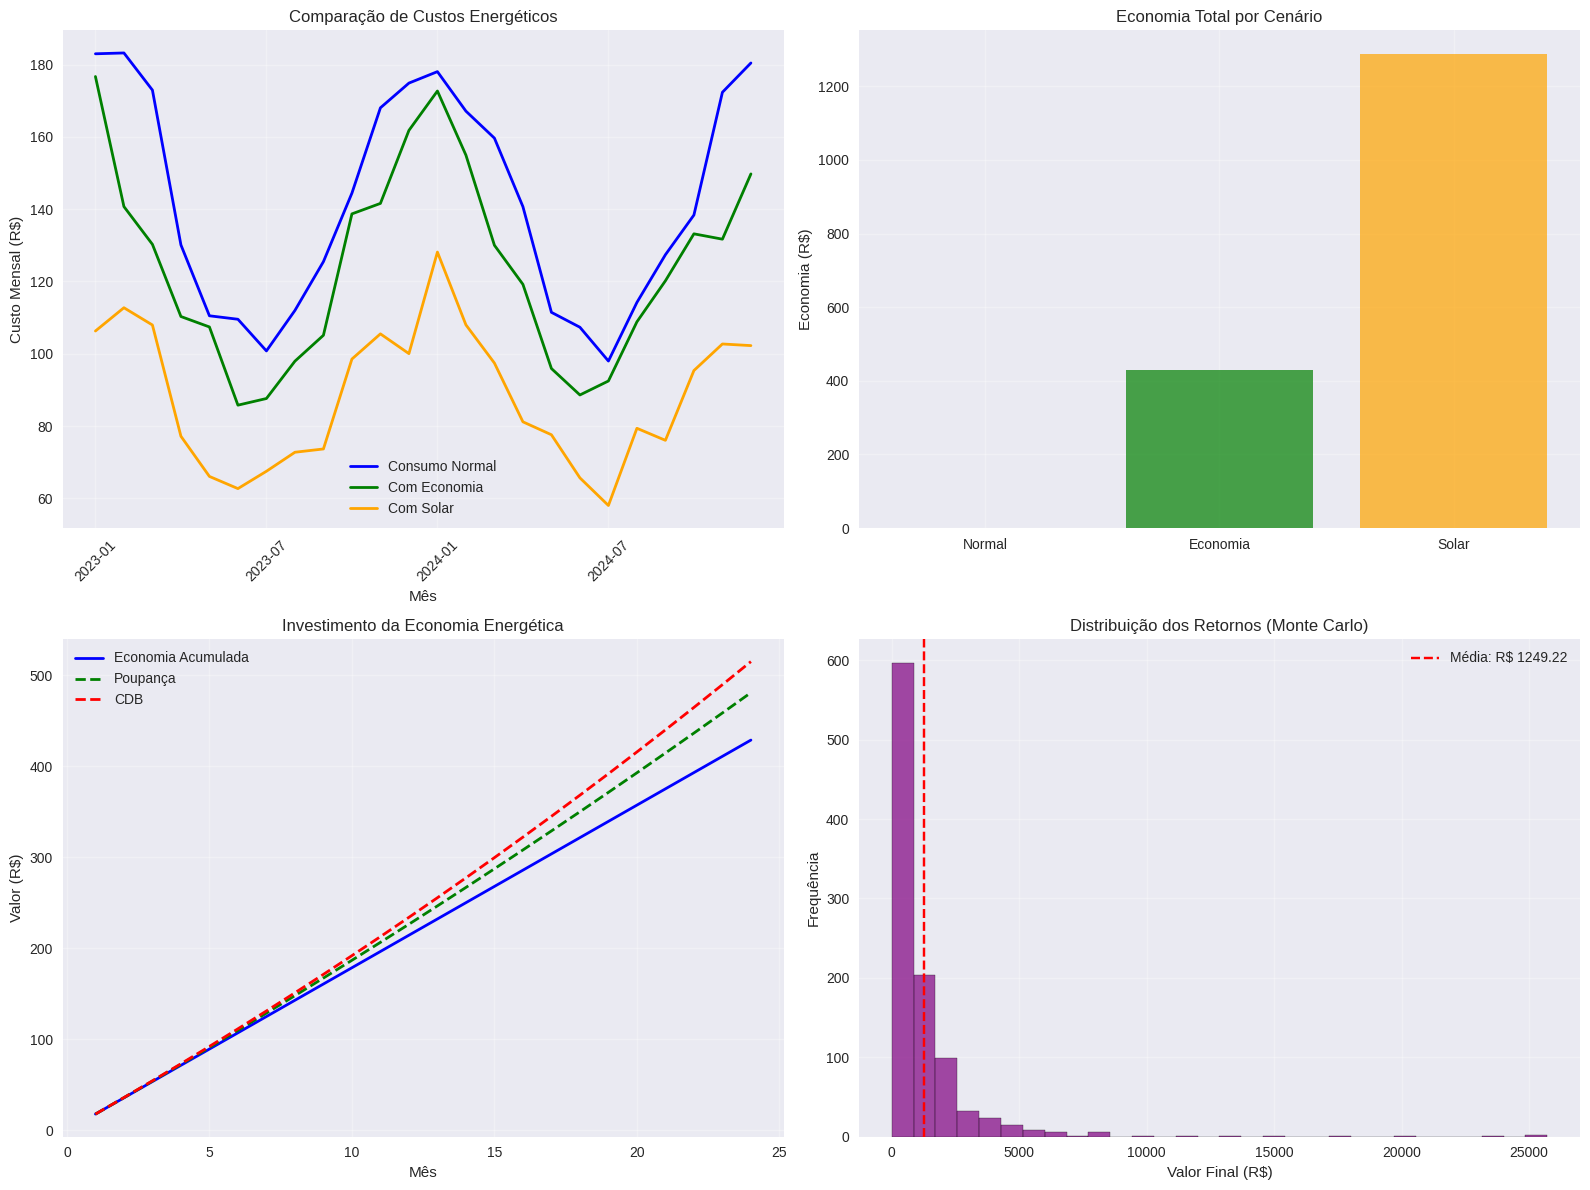

In [8]:
# Visualização final do projeto
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Gráfico 1: Comparação de consumo energético
meses_labels = [f"{dados_normal.iloc[i]['ano']}-{dados_normal.iloc[i]['mes']:02d}" 
                for i in range(0, len(dados_normal), 6)]
indices_labels = list(range(0, len(dados_normal), 6))

axes[0,0].plot(dados_normal['custo_reais'], 'b-', label='Consumo Normal', linewidth=2)
axes[0,0].plot(dados_economia['custo_reais'], 'g-', label='Com Economia', linewidth=2)
axes[0,0].plot(dados_solar['custo_reais'], 'orange', label='Com Solar', linewidth=2)
axes[0,0].set_title('Comparação de Custos Energéticos')
axes[0,0].set_xlabel('Mês')
axes[0,0].set_ylabel('Custo Mensal (R$)')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)
axes[0,0].set_xticks(indices_labels)
axes[0,0].set_xticklabels(meses_labels, rotation=45)

# Gráfico 2: Economia total por cenário
axes[0,1].bar(comparacao_energia['cenario'], comparacao_energia['economia_reais'], 
              color=['blue', 'green', 'orange'], alpha=0.7)
axes[0,1].set_title('Economia Total por Cenário')
axes[0,1].set_ylabel('Economia (R$)')
axes[0,1].grid(True, alpha=0.3)

# Gráfico 3: Investimento da economia
axes[1,0].plot(investimento_economia['mes'], investimento_economia['economia_acumulada'], 
               'b-', label='Economia Acumulada', linewidth=2)
axes[1,0].plot(investimento_economia['mes'], investimento_economia['rendimento_poupanca'], 
               'g--', label='Poupança', linewidth=2)
axes[1,0].plot(investimento_economia['mes'], investimento_economia['rendimento_cdb'], 
               'r--', label='CDB', linewidth=2)
axes[1,0].set_title('Investimento da Economia Energética')
axes[1,0].set_xlabel('Mês')
axes[1,0].set_ylabel('Valor (R$)')
axes[1,0].legend()
axes[1,0].grid(True, alpha=0.3)

# Gráfico 4: Simulação Monte Carlo - Retorno total
# Simulando 1000 cenários diferentes
retornos_simulacao = []
for i in range(1000):
    projeto_temp = ProjetoSimulacaoCompleta()
    comp_temp, _, _, _ = projeto_temp.simular_economia_energia()
    economia_temp = comp_temp['economia_reais'].iloc[1]  # Cenário economia
    
    # Simular investimento dessa economia
    invest_temp = projeto_temp.simular_investimento_economia(economia_temp/24, 24)
    retorno_final = invest_temp['rendimento_acoes'].iloc[-1]
    retornos_simulacao.append(retorno_final)

axes[1,1].hist(retornos_simulacao, bins=30, color='purple', alpha=0.7, edgecolor='black')
axes[1,1].axvline(np.mean(retornos_simulacao), color='red', linestyle='--', 
                  label=f'Média: R$ {np.mean(retornos_simulacao):.2f}')
axes[1,1].set_title('Distribuição dos Retornos (Monte Carlo)')
axes[1,1].set_xlabel('Valor Final (R$)')
axes[1,1].set_ylabel('Frequência')
axes[1,1].legend()
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 🎓 Exercícios Práticos

### Exercício 1: Modifique os parâmetros
Teste diferentes valores para:
- Consumo base de energia
- Tarifas de energia
- Fatores sazonais
- Taxas de retorno dos investimentos

### Exercício 2: Adicione novos fatores
Implemente:
- Inflação nos custos de energia
- Diferentes tipos de investimento (tesouro direto, fundos)
- Variação na tarifa de energia ao longo do tempo
- Eventos extremos (crise energética, crise econômica)

### Exercício 3: Análise de sensibilidade
Teste como mudanças nos parâmetros afetam os resultados:
- E se a economia de energia for maior/menor?
- E se os investimentos renderem mais/menos?
- Qual é o impacto da inflação?

🔍 Análise de Sensibilidade - Impacto da % de Economia:
   nivel_economia  economia_total  economia_mensal
0             5.0          274.09        11.420417
1            10.0          180.59         7.524583
2            15.0           44.53         1.855417
3            20.0          -78.01        -3.250417
4            25.0         -377.26       -15.719167
5            30.0         -545.60       -22.733333


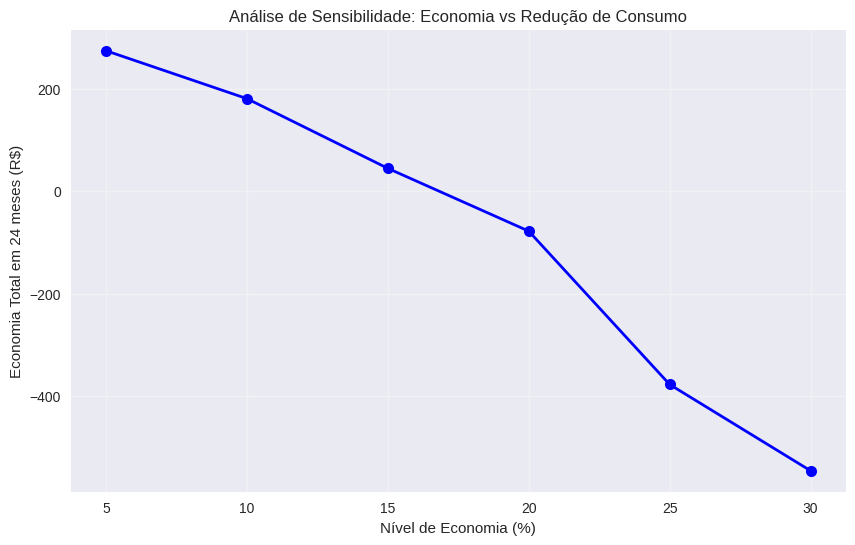

In [9]:
# Exemplo de análise de sensibilidade
def analise_sensibilidade():
    """
    Testa diferentes níveis de economia de energia
    """
    niveis_economia = [0.05, 0.10, 0.15, 0.20, 0.25, 0.30]  # 5% a 30% de economia
    resultados_sensibilidade = []
    
    for nivel in niveis_economia:
        # Simular com diferentes níveis de economia
        projeto_temp = ProjetoSimulacaoCompleta()
        projeto_temp.simulador_energia.consumo_base = 200 * (1 - nivel)
        
        comp_temp, _, dados_eco, _ = projeto_temp.simular_economia_energia()
        economia_total = comp_temp['economia_reais'].iloc[1]
        
        resultados_sensibilidade.append({
            'nivel_economia': nivel * 100,
            'economia_total': economia_total,
            'economia_mensal': economia_total / 24
        })
    
    return pd.DataFrame(resultados_sensibilidade)

# Executar análise
sensibilidade = analise_sensibilidade()

print("🔍 Análise de Sensibilidade - Impacto da % de Economia:")
print(sensibilidade)

# Visualizar análise de sensibilidade
plt.figure(figsize=(10, 6))
plt.plot(sensibilidade['nivel_economia'], sensibilidade['economia_total'], 
         'bo-', linewidth=2, markersize=8)
plt.xlabel('Nível de Economia (%)')
plt.ylabel('Economia Total em 24 meses (R$)')
plt.title('Análise de Sensibilidade: Economia vs Redução de Consumo')
plt.grid(True, alpha=0.3)
plt.show()

## 📚 Conceitos Avançados (Opcional)

### Distribuições Estatísticas
- **Normal**: Para variações naturais (consumo, retornos)
- **Uniforme**: Para eventos equiprováveis
- **Exponencial**: Para tempos de espera
- **Binomial**: Para eventos sim/não

### Técnicas de Simulação
- **Monte Carlo**: Usar aleatoriedade para resolver problemas
- **Bootstrapping**: Reamostragem de dados
- **Simulação de Eventos Discretos**: Modelar sistemas complexos

### Validação de Modelos
- Comparar com dados reais
- Testar sensibilidade dos parâmetros
- Análise de intervalos de confiança

In [10]:
# Exemplo avançado: Intervalo de confiança
def calcular_intervalo_confianca(dados, confianca=0.95):
    """
    Calcula intervalo de confiança para os dados
    """
    media = np.mean(dados)
    alpha = 1 - confianca
    percentil_inferior = (alpha/2) * 100
    percentil_superior = (1 - alpha/2) * 100
    
    ic_inferior = np.percentile(dados, percentil_inferior)
    ic_superior = np.percentile(dados, percentil_superior)
    
    return media, ic_inferior, ic_superior

# Aplicar aos retornos da simulação
media_retorno, ic_inf, ic_sup = calcular_intervalo_confianca(retornos_simulacao)

print(f"\n📊 Intervalo de Confiança (95%) para Retornos:")
print(f"Média: R$ {media_retorno:.2f}")
print(f"Intervalo: R$ {ic_inf:.2f} a R$ {ic_sup:.2f}")
print(f"Isso significa que há 95% de chance do retorno estar neste intervalo")


📊 Intervalo de Confiança (95%) para Retornos:
Média: R$ 1249.22
Intervalo: R$ 76.88 a R$ 5712.84
Isso significa que há 95% de chance do retorno estar neste intervalo


## 🎯 Resumo da Aula

### O que aprendemos:
1. **Simulação de consumo energético** com fatores sazonais e aleatórios
2. **Aplicação de probabilidade** em modelos computacionais
3. **Simulação de investimentos** com diferentes níveis de risco
4. **Análise comparativa** de cenários e estratégias
5. **Técnicas de Monte Carlo** para análise de incertezas

### Conceitos-chave:
- **Variabilidade**: Nem tudo é previsível, a aleatoriedade é importante
- **Cenários**: Sempre teste múltiplas possibilidades
- **Risco vs Retorno**: Investimentos com maior retorno têm maior risco
- **Validação**: Sempre compare com dados reais quando possível

### Próximo módulo:
- Introdução ao Machine Learning
- Modelos de predição
- Avaliação de modelos

### Para casa:
1. Modifique os parâmetros das simulações
2. Adicione novos fatores aos modelos
3. Pesquise dados reais para validar os modelos
4. Pense em outras situações onde a simulação seria útil

In [11]:
print("\n🎉 Parabéns! Você completou o Módulo 3 - Modelagem Computacional!")
print("Agora você sabe como criar modelos para simular situações do mundo real.")
print("No próximo módulo, vamos aprender Machine Learning! 🤖")


🎉 Parabéns! Você completou o Módulo 3 - Modelagem Computacional!
Agora você sabe como criar modelos para simular situações do mundo real.
No próximo módulo, vamos aprender Machine Learning! 🤖


## 🏆 Desafio Extra

**Desafio**: Crie um modelo que simule o impacto de carros elétricos no consumo energético de uma cidade.

**Considere**:
- Crescimento gradual na adoção de carros elétricos
- Diferentes padrões de recarga (casa, trabalho, postos públicos)
- Variação sazonal no consumo
- Impacto na rede elétrica da cidade

**Dica**: Use os conceitos aprendidos sobre crescimento populacional e consumo energético!

In [12]:
print("\n🚗⚡ Desafio aceito? Boa sorte!")


🚗⚡ Desafio aceito? Boa sorte!
